In [3]:
import pandas as pd
import seaborn as sns     
import numpy as np
from scipy.stats import norm # 정규분포 

import matplotlib.pyplot as plt 

In [59]:
dset = pd.read_csv("./exam.csv")
rset = pd.read_csv("./report.csv")

In [6]:
print(dset)

   id sex  midterm  final
0   1   M       79     90
1   2   F       81     77
2   3   F       56     56
3   4   M       90     78
4   5   F       77     65
5   6   F       89     70
6   7   M       45     60
7   8   M       65     70
8   9   F       59     77
9  10   F       70     80


In [9]:
dset.iloc[4,2] 

77

In [13]:
dset["total"] = dset["midterm"]*0.6 + dset["final"]*0.4

print(dset)

   id sex  midterm  final  total
0   1   M       79     90   83.4
1   2   F       81     77   79.4
2   3   F       56     56   56.0
3   4   M       90     78   85.2
4   5   F       77     65   72.2
5   6   F       89     70   81.4
6   7   M       45     60   51.0
7   8   M       65     70   67.0
8   9   F       59     77   66.2
9  10   F       70     80   74.0


<AxesSubplot:ylabel='sex'>

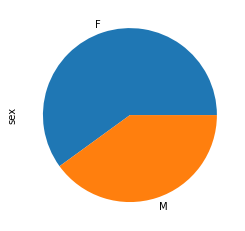

In [17]:
dset["sex"].value_counts().plot.pie() #1-3. 성별의 분포를 나타내어라.

<AxesSubplot:ylabel='Frequency'>

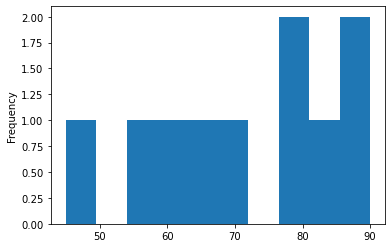

In [19]:
dset["midterm"].plot.hist()

<AxesSubplot:xlabel='id', ylabel='midterm'>

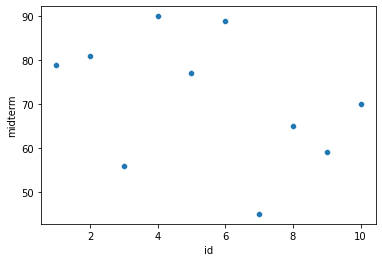

In [38]:
#1-5. 중간고사성적과 기말고사성적에 대한 산점도를 그려라.
sns.scatterplot(data=dset, x = 'id', y='midterm') #중간고사 성적 산점도

<AxesSubplot:xlabel='id', ylabel='final'>

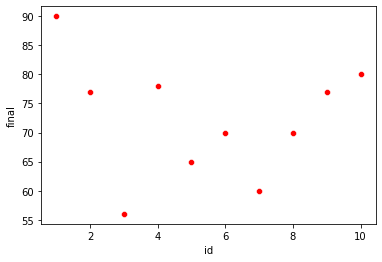

In [43]:
sns.scatterplot(data=dset, x = 'id', y='final', color = 'r') #기말고사성적에 대한 산점도

In [31]:
#1-7. 성별에 따른 기말고사 성적의 평균을 계산하고 비교하여라.

dset.groupby("sex")["final"].mean()

sex
F    70.833333
M    74.500000
Name: final, dtype: float64

In [44]:
print(dset)

   id sex  midterm  final  total
0   1   M       79     90   83.4
1   2   F       81     77   79.4
2   3   F       56     56   56.0
3   4   M       90     78   85.2
4   5   F       77     65   72.2
5   6   F       89     70   81.4
6   7   M       45     60   51.0
7   8   M       65     70   67.0
8   9   F       59     77   66.2
9  10   F       70     80   74.0


In [53]:
#1-8. 총점에 따라 자료를 정렬하여 보고 전체에서 3번째로 총점이 높은 학생이 몇 번(id기준)인지 산출하여라.
a = dset.sort_values(by = 'total', ascending=False)
a

,id,sex,midterm,final,total
3,4,M,90,78,85.2
0,1,M,79,90,83.4
5,6,F,89,70,81.4
1,2,F,81,77,79.4
9,10,F,70,80,74.0
4,5,F,77,65,72.2
7,8,M,65,70,67.0
8,9,F,59,77,66.2
2,3,F,56,56,56.0
6,7,M,45,60,51.0


In [54]:
a.iloc[2,0]

6

In [190]:
#1-9. 총점이 80점 이상이면 A학점, 60점 이상 80점 미만이면 B학점, 60점 미만이면 C학점을 부여하려고 한다. 학점을 나타내는 새로운 열(변수)를 만들어라.

dset["hak"] = [ "A", "A", "A", "B", "B","B", "B","B", "C", "C" ] 

# if dset["total"] >= 80:
#     print("A")
# elif dset["total"] >= 60:
#     print("B")
# else:
#     print("C") 
dset

,id,sex,midterm,final,hak
0,1,M,79,90,A
1,2,F,81,77,A
2,3,F,56,56,A
3,4,M,90,78,B
4,5,F,77,65,B
5,6,F,89,70,B
6,7,M,45,60,B
7,8,M,65,70,B
8,9,F,59,77,C
9,10,F,70,80,C


In [58]:
dset[dset["final"]>= 80].mean() #1-10. 기말고사 성적이 80점 이상인 학생들만 추출하고 그에 대한 평균을 구하여라.

/var/folders/xh/xtwkcbrj0_l1srsb4r5pc3l00000gn/T/ipykernel_83787/4252691933.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dset[dset["final"]>= 80].mean()


id          5.5
midterm    74.5
final      85.0
total      78.7
dtype: float64

In [129]:

#1-11. report.csv에는 위 exam.csv에 나타난 동일 학생들에 대한 번호(n)와 과제점수(report)가 포함되어 있다. 중간고사성적, 기말고사성적, 과제점수가 모두 포함된 데이터셋을 하나 만들어라. 단, 과제를 제출하지 않은 학생은 제외하여라.

ddd = pd.DataFrame( { 
    "midterm" : [79, 81, 56, 90, 89, 45, 65, 59], 
    "final" : [90, 77, 56, 78, 70, 60, 70, 77],
    "report" : [70, 78, 76, 89, 91, 58, 86, 55]
}, index = [1, 2, 3, 4, 6, 7, 8, 9])
ddd

,midterm,final,report
1,79,90,70
2,81,77,78
3,56,56,76
4,90,78,89
6,89,70,91
7,45,60,58
8,65,70,86
9,59,77,55


In [109]:
#1-12. 남학생들의 중간고사 성적만을 포함하고 있는 데이터프레임을 추출하여 정의하여라.

d = dset[ dset['sex'] == 'M' ]["midterm"]
d

0    79
3    90
6    45
7    65
Name: midterm, dtype: int64

# 2

In [121]:
df = pd.read_csv("mers_korea_2015.csv")
df.head()

,Unnamed: 0,id,age,age_class,sex,place_infect,reporting_ctry,loc_hosp,dt_onset,dt_report,week_report,dt_start_exp,dt_end_exp,dt_diag,outcome,dt_death
0,1,SK_1,68,60-69,M,Middle East,South Korea,"Pyeongtaek St. Mary, Hospital, Pyeongtaek, Gye...",2015-05-11,2015-05-19,2015_21,2015-04-18,2015-05-04,2015-05-20,Alive,NaN
1,2,SK_2,63,60-69,F,Outside Middle East,South Korea,"Pyeongtaek St. Mary, Hospital, Pyeongtaek, Gye...",2015-05-18,2015-05-20,2015_21,2015-05-15,2015-05-20,2015-05-20,Alive,NaN
2,3,SK_3,76,70-79,M,Outside Middle East,South Korea,"Pyeongtaek St. Mary, Hospital, Pyeongtaek, Gye...",2015-05-20,2015-05-20,2015_21,2015-05-16,2015-05-16,2015-05-21,Dead,2015-06-04
3,4,SK_4,46,40-49,F,Outside Middle East,South Korea,"Pyeongtaek St. Mary, Hospital, Pyeongtaek, Gye...",2015-05-25,2015-05-26,2015_22,2015-05-16,2015-05-20,2015-05-26,Alive,NaN
4,5,SK_5,50,50-59,M,Outside Middle East,South Korea,"365 Yeollin Clinic, Seoul",2015-05-25,2015-05-27,2015_22,2015-05-17,2015-05-17,2015-05-26,Alive,NaN


In [123]:
 # 2-1
df.groupby( by=["dt_report"] )

In [126]:
# 2-2
df.groupby( by=["age_class"] )

In [195]:
#2-3. 사망/생존 여부에 따른 연령의 분포를 나타내고 및 요약통계량을 산출하여라. 두 그룹을 비교하여 해석하여 보아라.
df.groupby( by=["outcome"] ).age_class.describe()

,count,unique,top,freq
outcome,,,,
Alive,143,8,50-59,31
Dead,19,5,70-79,7


# 3

In [136]:
A = np.arange(2, 101, 2).reshape(10,5)
A

array([[  2,   4,   6,   8,  10],
       [ 12,  14,  16,  18,  20],
       [ 22,  24,  26,  28,  30],
       [ 32,  34,  36,  38,  40],
       [ 42,  44,  46,  48,  50],
       [ 52,  54,  56,  58,  60],
       [ 62,  64,  66,  68,  70],
       [ 72,  74,  76,  78,  80],
       [ 82,  84,  86,  88,  90],
       [ 92,  94,  96,  98, 100]])

In [138]:
A[:2,]

array([[ 2,  4,  6,  8, 10],
       [12, 14, 16, 18, 20]])

## 4

In [142]:
x = 0
for i in np.arange(1,101) : 
    x =+ 2*i-1
x

199

In [148]:
y = 0

for i in np.arange(0,11) : 
    for j in np.arange(1, i+1) :
        y += i+j
        
y

605

## 5

In [160]:
# 5-1. 동전을 던지는 실험을 20회 반복하여라. 앞면이 나온 비율을 구하여라.

N = 20
count_head = 0

for i in np.arange(N) :

  x = np.random.rand(1)

  if x < 0.5 :
    count_head = count_head + 1

print(count_head/20*100)




40.0


In [164]:
#5-2. 실험횟수를 200회로 늘려서 하되 
N = 200
count_head = 0

for i in np.arange(N) :

  x = np.random.rand(1)

  if x < 0.5 :
    count_head = count_head + 1

count_head

#실험차수( 1,2,3,… )에 따른 앞면이 나온 비율의 변화를 그림으로 나타내어라.


113

# 6

In [165]:
A = 1000000
B = 1000000
P = 1/8 #1/16 + 1/16  

for i in np.arange(10) :
    x = np.random.rand(1)
    
    if x < 1/8 :
        A += 10000
        B -= 10000
    else :
        A -= 20000
        B += 20000


In [167]:
#6-1. 위와 같은 게임을 50번 반복하였을 때, A와 B의 남은 돈은 얼마가 되는지 표시하여라.
A = 1000000
B = 1000000
P = 1/8 #1/16 + 1/16  

for i in np.arange(50) :
    x = np.random.rand(1)
    
    if x < 1/8 :
        A += 10000
        B -= 10000
    else :
        A -= 20000
        B += 20000

print([A,B])

[270000, 1730000]


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([19.5, 19.6, 19.7, 19.8, 19.9, 20. , 20.1, 20.2, 20.3, 20.4, 20.5]),
 <BarContainer object of 10 artists>)

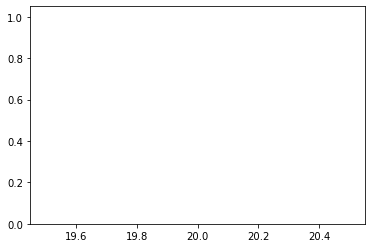

In [185]:
#6-2. 6-1과 같은 절차를 20번 반복하였을 때, A와 B의 남은 돈의 분포를 나타내어 보아라.
A = 1000000
B = 1000000
P = 1/8 #1/16 + 1/16  
N = 20

for i in np.arange(20) :
    x = np.random.rand(1)
    
    if x < 1/8 :
        A += 10000
        B -= 10000
    else :
        A -= 20000
        B += 20000

plt.hist(x = N, y = A)